# Airline_Passenger_Satisfaction

***
Problem statement 

Context:   
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? 
Can you predict passenger satisfaction?

Content:   
Gender: Gender of the passengers (Female, Male)   
Customer Type: The customer type (Loyal customer, disloyal customer)   
Age: The actual age of the passengers   
Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)   
Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)   
Flight distance: The flight distance of this journey   
Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)   
Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient   
Ease of Online booking: Satisfaction level of online booking   
Gate location: Satisfaction level of Gate location   
Food and drink: Satisfaction level of Food and drink   
Online boarding: Satisfaction level of online boarding    
Seat comfort: Satisfaction level of Seat comfort    
Inflight entertainment: Satisfaction level of inflight entertainment     
On-board service: Satisfaction level of On-board service    
Leg room service: Satisfaction level of Leg room service   
Baggage handling: Satisfaction level of baggage handling    
Check-in service: Satisfaction level of Check-in service    
Inflight service: Satisfaction level of inflight service   
Cleanliness: Satisfaction level of Cleanliness   
Departure Delay in Minutes: Minutes delayed when departure    
Arrival Delay in Minutes: Minutes delayed when Arrival     
Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)    

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

## Exploratory Data Analysis and Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

### Missing values and duplicates

In [5]:
pd.DataFrame({'Columns':df.columns,'Count':df.isnull().sum().values,'%':df.isnull().sum().values/df.shape[0]*100})

,Columns,Count,%
0,Gender,0,0.000000
1,Customer Type,0,0.000000
2,Age,0,0.000000
3,Type of Travel,0,0.000000
4,Class,0,0.000000
5,Flight Distance,0,0.000000
6,Inflight wifi service,0,0.000000
7,Departure/Arrival time convenient,0,0.000000
8,Ease of Online booking,0,0.000000
9,Gate location,0,0.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
Age,103904.0,39.379706,15.114964,7.0,8.0,20.0,27.0,40.0,51.0,59.0,70.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,101.0,236.0,414.0,843.0,1743.0,2750.0,3882.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,0.0,1.0,2.0,3.0,4.0,5.0,5.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,0.0,1.0,2.0,3.0,4.0,5.0,5.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,0.0,1.0,2.0,3.0,4.0,5.0,5.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,1.0,1.0,2.0,3.0,4.0,5.0,5.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,1.0,1.0,2.0,3.0,4.0,5.0,5.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,0.0,1.0,2.0,3.0,4.0,5.0,5.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,1.0,1.0,2.0,4.0,5.0,5.0,5.00,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,1.0,1.0,2.0,4.0,4.0,5.0,5.00,5.0


- Observed a large deviation in values from 99 percentile to max value in Departure Delay in Minutes and Arrival Delay in Minutes.

### Differentiating numerical and categorical features

In [8]:
df_num=df.select_dtypes('number')
df_char=df.select_dtypes('object')
df_num.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [9]:
df_char.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


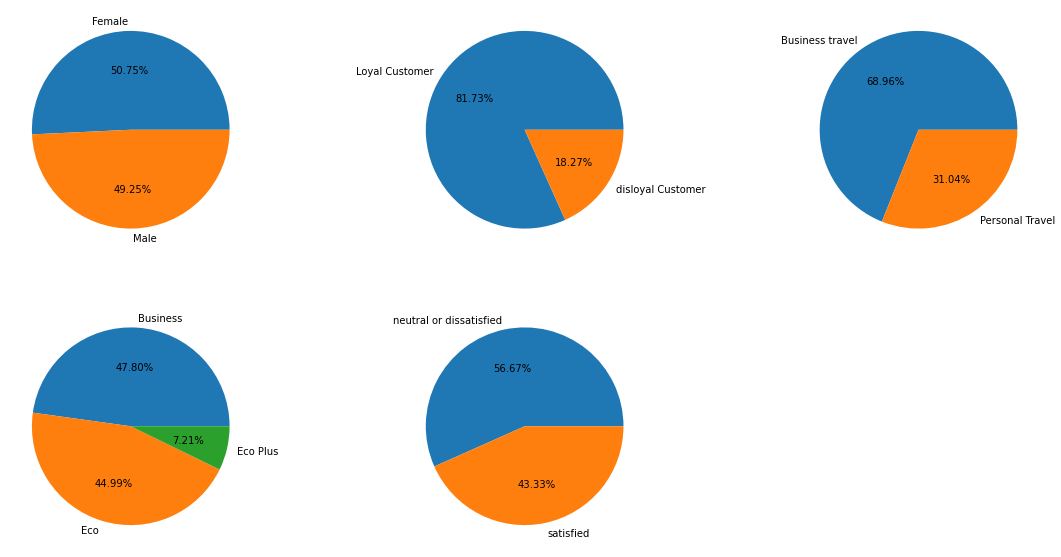

In [10]:
plt.figure(figsize=(20,10))
for i,col in enumerate(df_char):
    plt.subplot(2,3,i+1)
    plt.pie(df_char[col].value_counts(),labels=df_char[col].value_counts().keys(),autopct='%0.2F%%')

- Target feature 'satisfaction' have enough balanced values

### Defining Target variables 

- Defining Target variable satisfied as 1 and neutral or dissatisfied as 0.

In [11]:
y=df_char[['satisfaction']]
y['satisfaction']=np.where(y['satisfaction']=='satisfied',1,0)
df_char.drop(['satisfaction'],axis=1,inplace=True)
y.head()

,satisfaction
0,0
1,0
2,1
3,0
4,1


In [12]:
df_char.head()

,Gender,Customer Type,Type of Travel,Class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business


### Bi-variate analysis of categorical features

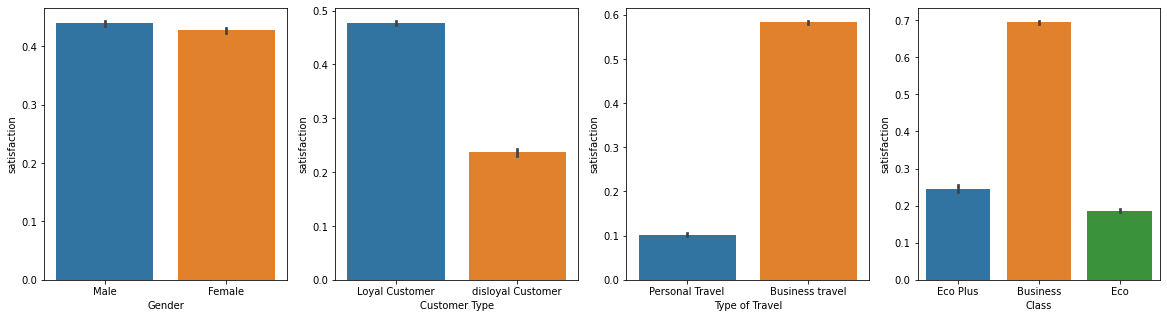

In [13]:
plt.figure(figsize=(20,5))
for i,col in enumerate(df_char):
    plt.subplot(1,4,i+1)
    sns.barplot(df_char[col],y['satisfaction'])

- In Gender feature there is almost equal chances for both male and female in prediction. So it doesn't influence much on predictions 

In [14]:
def check_count(X):
    X=X.value_counts().count()
    return X
df_num_counts=pd.DataFrame(df_num.apply(lambda X: check_count(X)),columns=['Value_counts'])
df_num_counts

,Value_counts
Age,75
Flight Distance,3802
Inflight wifi service,6
Departure/Arrival time convenient,6
Ease of Online booking,6
Gate location,6
Food and drink,6
Online boarding,6
Seat comfort,6
Inflight entertainment,6


- Numerical features having value counts less than 10 are considered as categorical features.

In [15]:
df_cat=df_num[df_num_counts[df_num_counts['Value_counts']<10].index]
df_num=df_num[df_num_counts[df_num_counts['Value_counts']>10].index]
df_cat.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3


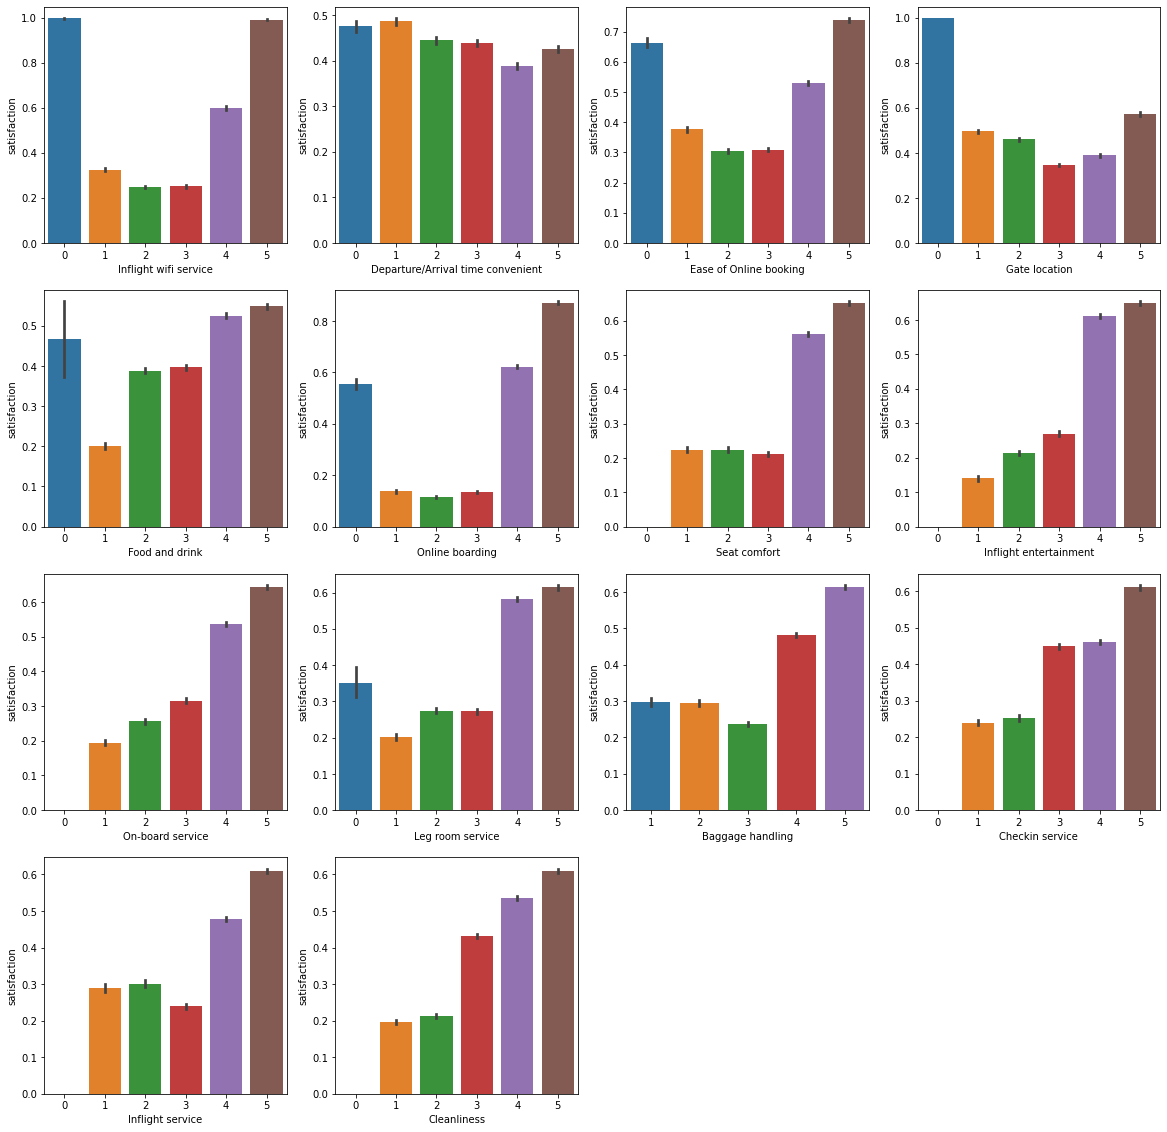

In [16]:
plt.figure(figsize=(20,20))
for i,col in enumerate(df_cat):
    plt.subplot(4,4,i+1)
    sns.barplot(df_cat[col],y['satisfaction'])

- In all the features there is variation in values w.r.t target variable, so all the features plays importance in predictions.

In [17]:
df_num.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25,18.0
1,25,235,1,6.0
2,26,1142,0,0.0
3,25,562,11,9.0
4,61,214,0,0.0


### Pearson's correlation coefficient

<AxesSubplot:>

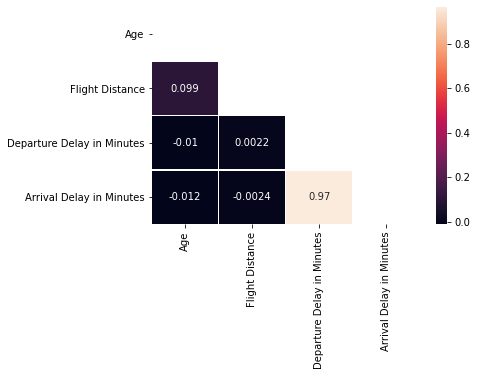

In [18]:
sns.heatmap(df_num.corr(),annot=True,linewidths=0.3,mask=np.triu(df_num.corr()))

- Departure Delay in Minutes and Arrival Delay in Minutes are highly correlated.
- One of them could be dropped.

### Distribution plots of numerical features

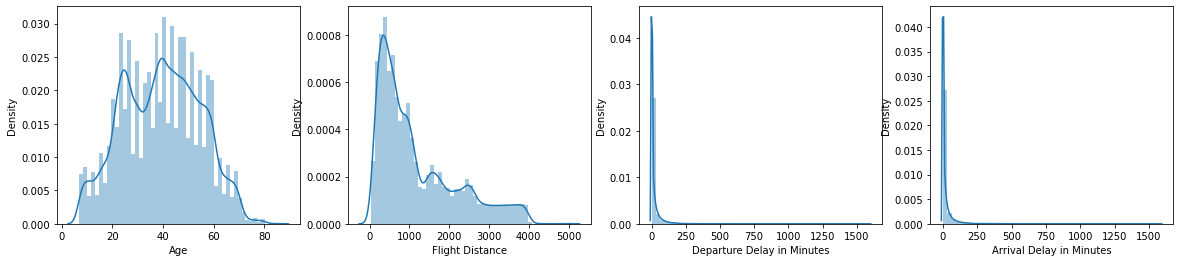

In [19]:
plt.figure(figsize=(20,4))
for i, col in enumerate(df_num):
    plt.subplot(1,4,i+1)
    sns.distplot(df[col])

- Departure Delay in Minutes and Arrival Delay in Minutes are highly right skewed.

### Dropping features

In [20]:
df_num.drop(['Arrival Delay in Minutes'],axis=1,inplace=True)

- There is high correlation between Departure Delay in Minutes and Arrival Delay in Minutes.
- Also there are missing values in it.
- So, Arrival Delay in Minutes is dropped.

### Scaling of numerical features

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_num=pd.DataFrame(scaler.fit_transform(df_num),index=df_num.index,columns=df_num.columns)
df_num.head()

,Age,Flight Distance,Departure Delay in Minutes
0,-1.745279,-0.731539,0.266393
1,-0.951360,-0.957184,-0.361375
2,-0.885200,-0.047584,-0.387532
3,-0.951360,-0.629246,-0.099805
4,1.430397,-0.978244,-0.387532


In [22]:
df_num.describe(percentiles=(0.01,0.1,0.25,0.5,0.75,0.9,0.99)).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
Age,103904.0,-2.821431e-15,1.000005,-2.142239,-2.076079,-1.282160,-0.819040,0.041039,0.768798,1.298077,2.025836,3.018235
Flight Distance,103904.0,1.029401e-16,1.000005,-1.161768,-1.091568,-0.956181,-0.777671,-0.347441,0.555138,1.565024,2.700268,3.804423
Departure Delay in Minutes,103904.0,-1.153198e-16,1.000005,-0.387532,-0.387532,-0.387532,-0.387532,-0.387532,-0.073648,0.763375,4.372253,41.254377


### Encoding of categorical features using OneHotEncoder

In [23]:
df_char=pd.get_dummies(df_char,drop_first=True)
df_char.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,0,1,0,1
1,1,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0


In [24]:
df_fin=pd.concat([df_num,df_char,df_cat,y],axis=1)
df_fin.head()

,Age,Flight Distance,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,-1.745279,-0.731539,0.266393,1,0,1,0,1,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0
1,-0.951360,-0.957184,-0.361375,1,1,0,0,0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0
2,-0.885200,-0.047584,-0.387532,0,0,0,0,0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1
3,-0.951360,-0.629246,-0.099805,0,0,0,0,0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0
4,1.430397,-0.978244,-0.387532,1,0,0,0,0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1


### Outlier Treatment

- Only those data points retained which are within 99 percentile of Departure Delay in Minutes.

In [25]:
df_fin=df_fin[df_fin['Departure Delay in Minutes']<np.percentile(df_fin['Departure Delay in Minutes'],99)]
df_fin.head()

,Age,Flight Distance,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,-1.745279,-0.731539,0.266393,1,0,1,0,1,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0
1,-0.951360,-0.957184,-0.361375,1,1,0,0,0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0
2,-0.885200,-0.047584,-0.387532,0,0,0,0,0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1
3,-0.951360,-0.629246,-0.099805,0,0,0,0,0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0
4,1.430397,-0.978244,-0.387532,1,0,0,0,0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1


### Splitting data into Train and Test.

In [26]:
from sklearn.model_selection import train_test_split
X=df_fin.drop(['satisfaction'],axis=1)
y=df_fin['satisfaction']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [27]:
print(df_fin.shape)
print(X_train.shape)
print(X_test.shape)

(102864, 23)
(82291, 22)
(20573, 22)


## Model Building 

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
log_clf=LogisticRegression()
log_clf.fit(X_train,y_train)

LogisticRegression()

#### Result printing function

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
def result_print(clf,X_train,X_test,y_train,y_test):
    y_pred=clf.predict(X_train)
    y_pred1=clf.predict(X_test)

    print('Train data Evaluation:')
    print('=========================================================')
    print('Accuracy Score:',accuracy_score(y_pred,y_train))
    print('Confusion Matrix:')
    display(pd.DataFrame(confusion_matrix(y_pred,y_train)))
    print('Classification Matrix:')
    display(pd.DataFrame(classification_report(y_pred,y_train,output_dict=True)))

    print('Test data Evaluation:')
    print('=========================================================')
    print('Accuracy Score:',accuracy_score(y_pred1,y_test))
    print('Confusion Matrix:')
    display(pd.DataFrame(confusion_matrix(y_pred1,y_test)))
    print('Classification Matrix:')
    display(pd.DataFrame(classification_report(y_pred1,y_test,output_dict=True)))


#### Evaluation

In [30]:
result_print(log_clf,X_train,X_test,y_train,y_test)

Train data Evaluation:
Accuracy Score: 0.8753326609228227
Confusion Matrix:


,0,1
0,42142,5833
1,4426,29890


Classification Matrix:


,0,1,accuracy,macro avg,weighted avg
precision,0.904956,0.836716,0.875333,0.870836,0.876499
recall,0.878416,0.871022,0.875333,0.874719,0.875333
f1-score,0.891489,0.853524,0.875333,0.872506,0.875657
support,47975.000000,34316.000000,0.875333,82291.000000,82291.000000


Test data Evaluation:
Accuracy Score: 0.8752248092159627
Confusion Matrix:


,0,1
0,10506,1428
1,1139,7500


Classification Matrix:


,0,1,accuracy,macro avg,weighted avg
precision,0.902190,0.840054,0.875225,0.871122,0.876098
recall,0.880342,0.868156,0.875225,0.874249,0.875225
f1-score,0.891132,0.853874,0.875225,0.872503,0.875487
support,11934.000000,8639.000000,0.875225,20573.000000,20573.000000


### Support Vector Machine

In [31]:
from sklearn.svm import SVC
SVC_clf=SVC(kernel='rbf',C=10,gamma=0.1)
SVC_clf.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

#### Evaluation

In [32]:
result_print(SVC_clf,X_train,X_test,y_train,y_test)

Train data Evaluation:
Accuracy Score: 0.9912384100326889
Confusion Matrix:


,0,1
0,46358,511
1,210,35212


Classification Matrix:


,0,1,accuracy,macro avg,weighted avg
precision,0.995490,0.985695,0.991238,0.990593,0.991274
recall,0.989097,0.994071,0.991238,0.991584,0.991238
f1-score,0.992284,0.989866,0.991238,0.991075,0.991243
support,46869.000000,35422.000000,0.991238,82291.000000,82291.000000


Test data Evaluation:
Accuracy Score: 0.9542604384387304
Confusion Matrix:


,0,1
0,11264,560
1,381,8368


Classification Matrix:


,0,1,accuracy,macro avg,weighted avg
precision,0.967282,0.937276,0.95426,0.952279,0.954522
recall,0.952639,0.956452,0.95426,0.954545,0.954260
f1-score,0.959905,0.946767,0.95426,0.953336,0.954318
support,11824.000000,8749.000000,0.95426,20573.000000,20573.000000


## Observations and Inference

- Data set contains both numerical and categorical features.
- There are some misiing values in Arrival Delay in Minutes.
- Target variable 'satisfaction' had to be converted as binary.
- There are high correlation between some of the features, some features needs to be dropped.
- Some of the features are right skewed, had to do outlier treatment.
- Numerical features needs scaling as there is different ranges.
- Categorical features needs encoding.
- Models are built with preprocessed data.
- LogisticRegression model is built with f1-score of 87% in both Train and Test data.
- Support Vector Classifier is built with tuned parameter with f1-score 99% in Train and 95% in Test data